In [1]:
from transformers import BertModel,BertForSequenceClassification

In [2]:
model_name = 'bert-base-uncased'

In [3]:
model = BertModel.from_pretrained(model_name)
cls_model = BertForSequenceClassification.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

C:\Users\juju\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\juju\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [4]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [5]:
cls_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

### summary
- bert:encoder of transformer
    - transformer: encoder-decoder(seq2seq)
- bert
    - embeddings
        - word(token)_embeddings
        - position_embeddings
        - token(segment)_type_embeddings
        - LayerNorm
        - dropout
    - encoder(12layer)
        - self attention(kqv)
        - feed forward
    - pooler


In [12]:
# 参数量统计
total_params = 0
total_learnable_params = 0
total_embedding_params = 0
total_encoder_params = 0
total_pooler_params = 0

for name, param in model.named_parameters():
    print(name, '->', param.shape, '->',param.numel())
    if 'embedding' in name:
        total_embedding_params += param.numel()
    if 'encoder' in name:
        total_encoder_params += param.numel()
    if 'pooler' in name:
        total_pooler_params += param.numel()

    if param.requires_grad:
        total_learnable_params += param.numel()
    total_params += param.numel()

embeddings.word_embeddings.weight -> torch.Size([30522, 768]) -> 23440896
embeddings.position_embeddings.weight -> torch.Size([512, 768]) -> 393216
embeddings.token_type_embeddings.weight -> torch.Size([2, 768]) -> 1536
embeddings.LayerNorm.weight -> torch.Size([768]) -> 768
embeddings.LayerNorm.bias -> torch.Size([768]) -> 768
encoder.layer.0.attention.self.query.weight -> torch.Size([768, 768]) -> 589824
encoder.layer.0.attention.self.query.bias -> torch.Size([768]) -> 768
encoder.layer.0.attention.self.key.weight -> torch.Size([768, 768]) -> 589824
encoder.layer.0.attention.self.key.bias -> torch.Size([768]) -> 768
encoder.layer.0.attention.self.value.weight -> torch.Size([768, 768]) -> 589824
encoder.layer.0.attention.self.value.bias -> torch.Size([768]) -> 768
encoder.layer.0.attention.output.dense.weight -> torch.Size([768, 768]) -> 589824
encoder.layer.0.attention.output.dense.bias -> torch.Size([768]) -> 768
encoder.layer.0.attention.output.LayerNorm.weight -> torch.Size([768])

In [10]:
total_params

109482240

In [11]:
total_learnable_params

109482240

In [15]:
print(total_embedding_params, total_encoder_params,total_pooler_params, "", end="")

23837184 85054464 590592 

In [14]:
params = [total_embedding_params,total_encoder_params,total_pooler_params]
for param in params:
    print(param/sum(params))


0.21772649152958506
0.776879099295009
0.005394409175405983


bert-base 与 bert-large


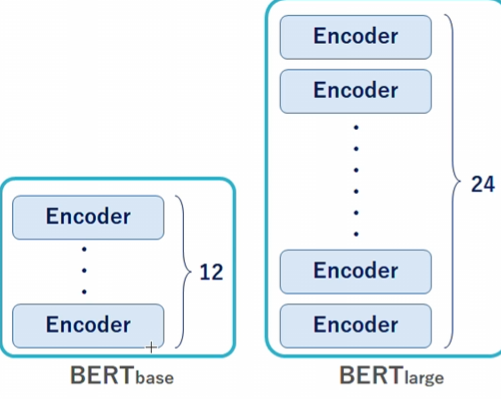

transformers architecture

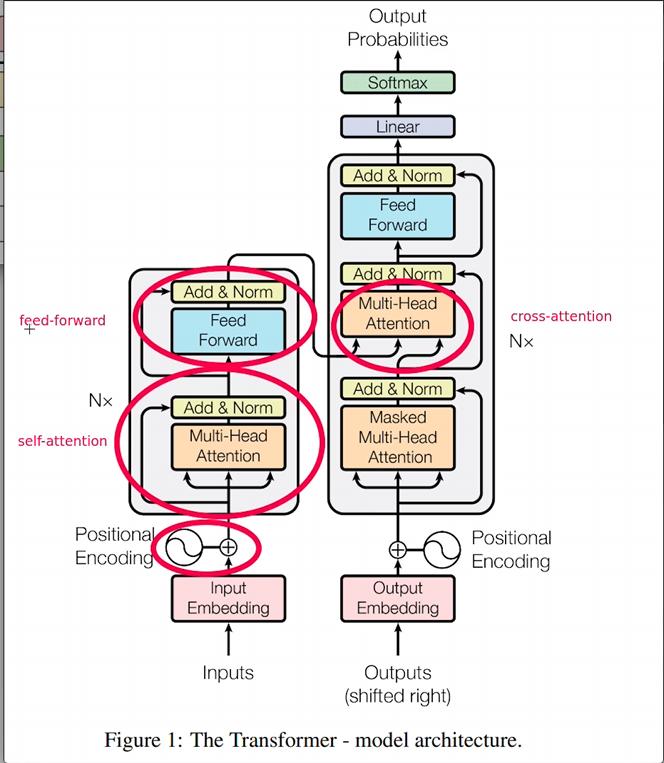

## 核心知识总结

### 1. 模型加载报告解读

#### ⚠️ HuggingFace缓存警告
```
UserWarning: cache-system uses symlinks by default...
```
- **原因**: Windows系统默认不支持符号链接
- **影响**: 缓存仍能工作，但占用更多磁盘空间
- **解决**: 设置环境变量 `HF_HUB_DISABLE_SYMLINKS_WARNING=true`

#### 📊 加载报告状态
| 状态 | 含义 | 是否正常 |
|------|------|----------|
| **UNEXPECTED** | checkpoint中有但模型不需要的参数 | ✅ 正常 |
| **MISSING** | 模型需要但checkpoint中没有的参数 | ⚠️ 需要初始化并训练 |

**BertModel的UNEXPECTED参数**:
```
cls.predictions.*        → MLM(掩码语言建模)预训练头
cls.seq_relationship.*   → NSP(下一句预测)预训练头
```
这些参数会被自动忽略，基础BERT只需要编码器部分。

**BertForSequenceClassification的MISSING参数**:
```
classifier.weight        → 分类头权重
classifier.bias          → 分类头偏置
```
这些参数会被随机初始化，需要在下游任务上微调。

---

### 2. 两种BERT模型对比

| 对比项 | **BertModel** | **BertForSequenceClassification** |
|--------|---------------|----------------------------------|
| **完整结构** | Embeddings + Encoder(12层) + Pooler | **BERT + Dropout + Classifier** |
| **输出** | 隐藏表示 (768维向量) | 分类logits (num_classes维) |
| **用途** | 特征提取、句嵌入 | 文本分类任务 |
| **使用方式** | 作为backbone | 端到端训练 |
| **新增参数** | 无 | 分类头 (~1.5K参数) |

**架构差异**:
```
BertModel:          输入 → BERT → [CLS]表示(768维)
BertForSeqClass:    输入 → BERT → Dropout → Linear(768→2) → 类别分数
                                         ↑
                                   分类头(随机初始化)
```

---

### 3. BERT架构详解

#### 📦 完整结构
```
BertModel
├── Embeddings (21.8% 参数)
│   ├── word_embeddings:      (30522, 768)   词向量
│   ├── position_embeddings:  (512, 768)     位置编码
│   ├── token_type_embeddings:(2, 768)       句子类型
│   ├── LayerNorm
│   └── dropout (p=0.1)
│
├── Encoder (77.7% 参数) × 12层
│   ├── Self-Attention (Q/K/V投影)
│   │   ├── query:  Linear(768 → 768)
│   │   ├── key:    Linear(768 → 768)
│   │   └── value:  Linear(768 → 768)
│   │
│   ├── Feed-Forward Network
│   │   ├── dense:  Linear(768 → 3072)  # 扩展4倍
│   │   └── GELU激活函数
│   │
│   └── Residual Connection + LayerNorm
│
└── Pooler (0.5% 参数)
    ├── Linear(768 → 768)
    └── Tanh激活
```

#### 📈 参数量分布
- **总参数**: 109,482,240 ≈ **110M**
- **Embeddings**: 23.8M (21.8%)
- **Encoder**: 85.1M (77.7%)
- **Pooler**: 0.6M (0.5%)

---

### 4. bert-base vs bert-large

| 配置 | bert-base | bert-large |
|------|-----------|------------|
| Encoder层数 | 12 | 24 |
| 隐藏维度 | 768 | 1024 |
| Attention头数 | 12 | 16 |
| FFN中间维度 | 3072 | 4096 |
| **总参数量** | **110M** | **340M** |

---

### 5. 实用建议

#### 🔧 何时使用BertModel?
- 需要获取句子的稠密向量表示
- 语义相似度计算
- 作为其他模型的特征提取器
- 需要自定义任务头

#### 🎯 何时使用BertForSequenceClassification?
- 直接进行文本分类（情感分析、主题分类等）
- 快速原型开发
- 不需要自定义复杂输出层

#### 💡 微调注意事项
1. **分类头参数**: 加载时为MISSING状态，需要从头训练
2. **学习率**: 建议分类头使用更大学习率，BERT backbone使用较小学习率
3. **冻结策略**: 可以先冻结BERT，只训练分类头，再端到端微调

#### 🔑 关键参数配置
```python
# 修改分类类别数
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=5  # 改为5分类
)

# 输出所有层隐藏状态
model = BertModel.from_pretrained(
    'bert-base-uncased',
    output_hidden_states=True
)
```